In [2]:
# python -m ipykernel install --user --name=envseg --display-name="Python (envseg)"
import numpy as np
import nibabel as nib
from ipyvolume import figure, volshow, show
import os

# Load the segmentation NIfTI file
print(os.getcwd())
# os.chdir("..")

print(os.getcwd())
nifti_file_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
segmentation_img = nib.load(nifti_file_path)
segmentation_data = segmentation_img.get_fdata()

# Convert segmentation data to uint8 (if not already) for visualization
# This step may vary depending on your specific data and needs
segmentation_data = segmentation_data.astype(np.uint8)

# Create an interactive plot
figure()
# You can adjust the level of opacity and other visualization parameters to suit your data
volshow(segmentation_data, level=[0.25, 0.5, 0.75], opacity=0.03, controls=True)
# show()



/home/rnga/dawezenberg/my-rdisk/r-divi/RNG/Projects/stages/Pim/Doris/nnUNet
/home/rnga/dawezenberg/my-rdisk/r-divi/RNG/Projects/stages/Pim/Doris/nnUNet


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/ipyvolume/serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Volume(data=array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],…

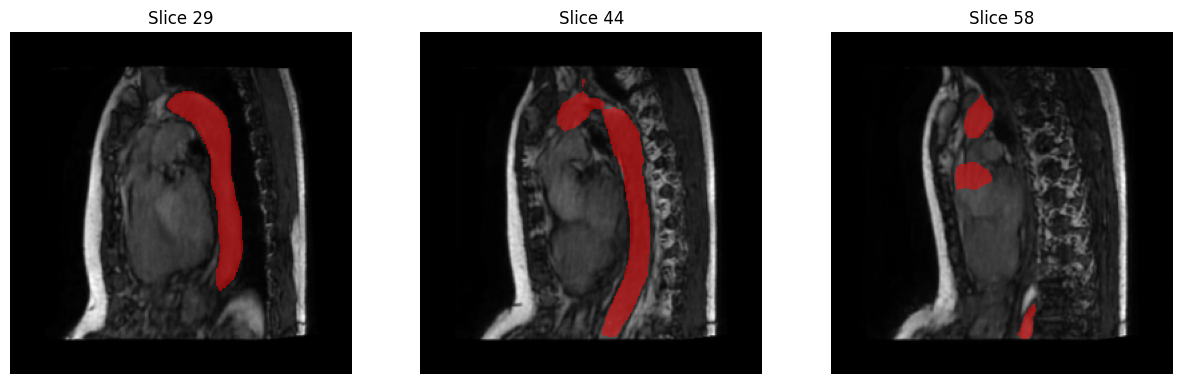

In [24]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the original and segmentation images
original_image_path = "/home/rnga/dawezenberg/my-scratch/nnUNet_raw_data_base/nnUNet_raw_data/Task531_3D_cine_root_branches/imagesTs/scan_144_b05_0000.nii.gz"
segmentation_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

# Extract the data arrays
original_data = original_img.get_fdata()
segmentation_data = segmentation_img.get_fdata()

# Choose slices to display
slice_indices = [original_data.shape[2] // 3, original_data.shape[2] // 2, 2 * original_data.shape[2] // 3]

fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    # Display the original image slice
    axes[i].imshow(original_data[:, :, slice_index], cmap='gray')
    # Overlay the segmentation (with transparency where segmentation is zero)
    axes[i].imshow(np.ma.masked_equal(segmentation_data[:, :, slice_index], 0), cmap='autumn', alpha=0.5)
    axes[i].set_title(f'Slice {slice_index}')
    axes[i].axis('off')
plt.show()


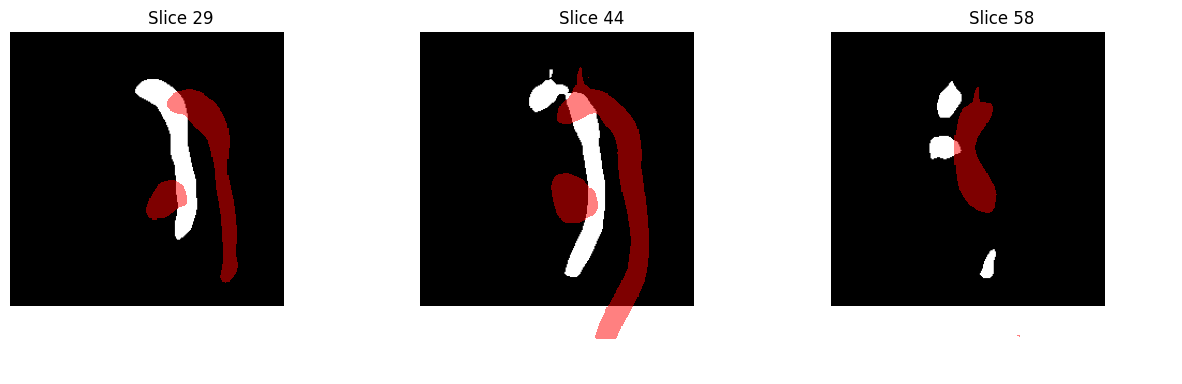

In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the original and segmentation images
original_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
segmentation_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/gt/scan_144_b05.nii.gz"
original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

# Extract the data arrays
original_data = original_img.get_fdata()
segmentation_data = segmentation_img.get_fdata()

print(original_data.shape)
print(segmentation_data.shape)

# Choose slices to display
slice_indices = [original_data.shape[2] // 3, original_data.shape[2] // 2, 2 * original_data.shape[2] // 3]

fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    # Display the original image slice
    axes[i].imshow(original_data[:, :, slice_index], cmap='gray')
    # Overlay the segmentation (with transparency where segmentation is zero)
    axes[i].imshow(np.ma.masked_equal(segmentation_data[:, :, slice_index], 0), cmap='autumn', alpha=0.5)
    axes[i].set_title(f'Slice {slice_index}')
    axes[i].axis('off')
plt.show()


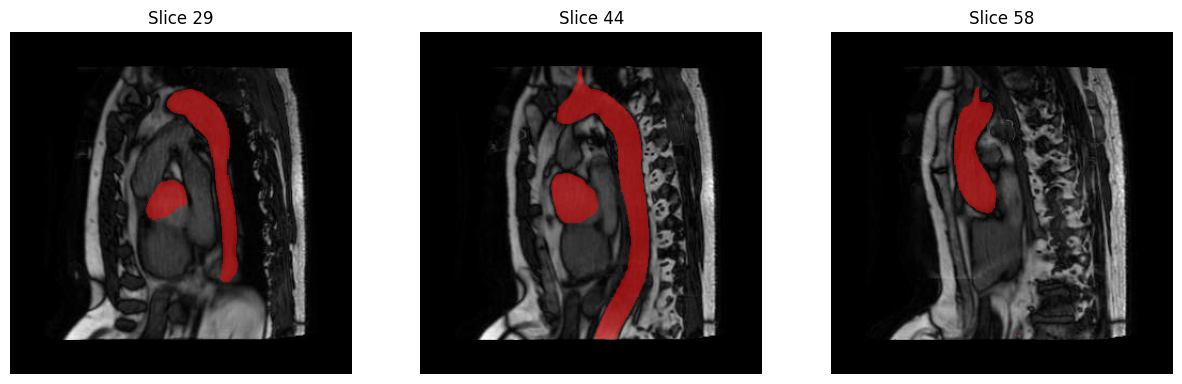

In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the original and segmentation images
original_image_path = "/home/rnga/dawezenberg/my-scratch/nnUNet_raw_data_base/nnUNet_raw_data/Task531_3D_cine_root_branches_gt/imagesTs/scan_144_b05_0000.nii.gz"
segmentation_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/gt/scan_144_b05.nii.gz"
original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

# Extract the data arrays
original_data = original_img.get_fdata()
segmentation_data = segmentation_img.get_fdata()

# Choose slices to display
slice_indices = [original_data.shape[2] // 3, original_data.shape[2] // 2, 2 * original_data.shape[2] // 3]

fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    # Display the original image slice
    axes[i].imshow(original_data[:, :, slice_index], cmap='gray')
    # Overlay the segmentation (with transparency where segmentation is zero)
    axes[i].imshow(np.ma.masked_equal(segmentation_data[:, :, slice_index], 0), cmap='autumn', alpha=0.5)
    axes[i].set_title(f'Slice {slice_index}')
    axes[i].axis('off')
plt.show()


In [4]:
import numpy as np
import nibabel as nib
import ipyvolume as ipv

# Load the original and segmentation images
original_image_path = "/home/rnga/dawezenberg/my-scratch/nnUNet_raw_data_base/nnUNet_raw_data/Task531_3D_cine_root_branches_gt/imagesTs/scan_144_b05_0000.nii.gz"
segmentation_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/gt/scan_144_b05.nii.gz"
original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

# Extract the data arrays
original_data = original_img.get_fdata()
segmentation_data = segmentation_img.get_fdata()

# Create a figure for 3D plotting
ipv.figure()

# Volume render the original image
ipv.volshow(original_data, level=[0.25, 0.5, 0.75], opacity=0.1, controls=True, lighting=True)

# Overlay the segmentation
# For binary or discrete data, consider preprocessing for color or directly use as is
ipv.volshow(segmentation_data, level=[0.25, 0.75], opacity=0.5, controls=True)

# ipv.show()


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/ipyvolume/serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Volume(data=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0.,…